In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
from scipy.stats import pearsonr, spearmanr
from IPython.display import display

In [2]:
cleaned_dfs = []
for df, setting in zip(
    [
        pd.read_csv("/root/similaritybench/experiments/results/nlp_aug_sst2.csv"),
        pd.read_csv("/root/similaritybench/experiments/results/nlp_mem_sst2.csv"),
        pd.read_csv("/root/similaritybench/experiments/results/nlp_shortcut_sst2.csv"),
    ],
    ["aug", "mem", "sc"],
):
    data = df.loc[2:].copy().reset_index(drop=True)
    data.columns = ["Similarity Measure", "Violation Rate", "AUPRC"]
    data["Architecture"] = "BERT-L"
    data.loc[:, "Violation Rate"] = data.loc[:, "Violation Rate"].astype(float)
    data.loc[:, "AUPRC"] = data.loc[:, "AUPRC"].astype(float)
    data = data.melt(
        id_vars=["Similarity Measure", "Architecture"],
        value_vars=["Violation Rate", "AUPRC"],
        var_name="Quality Metric",
        value_name="Score",
    )
    data["Setting"] = setting

    cleaned_dfs.append(data)

data = pd.concat(cleaned_dfs).reset_index(drop=True)
data.head()

,Similarity Measure,Architecture,Quality Metric,Score,Setting
0,AlignedCosineSimilarity,BERT-L,Violation Rate,0.408722,aug
1,CKA,BERT-L,Violation Rate,0.342889,aug
2,ConcentricityDifference,BERT-L,Violation Rate,0.467389,aug
3,DistanceCorrelation,BERT-L,Violation Rate,0.345522,aug
4,EigenspaceOverlapScore,BERT-L,Violation Rate,0.516689,aug


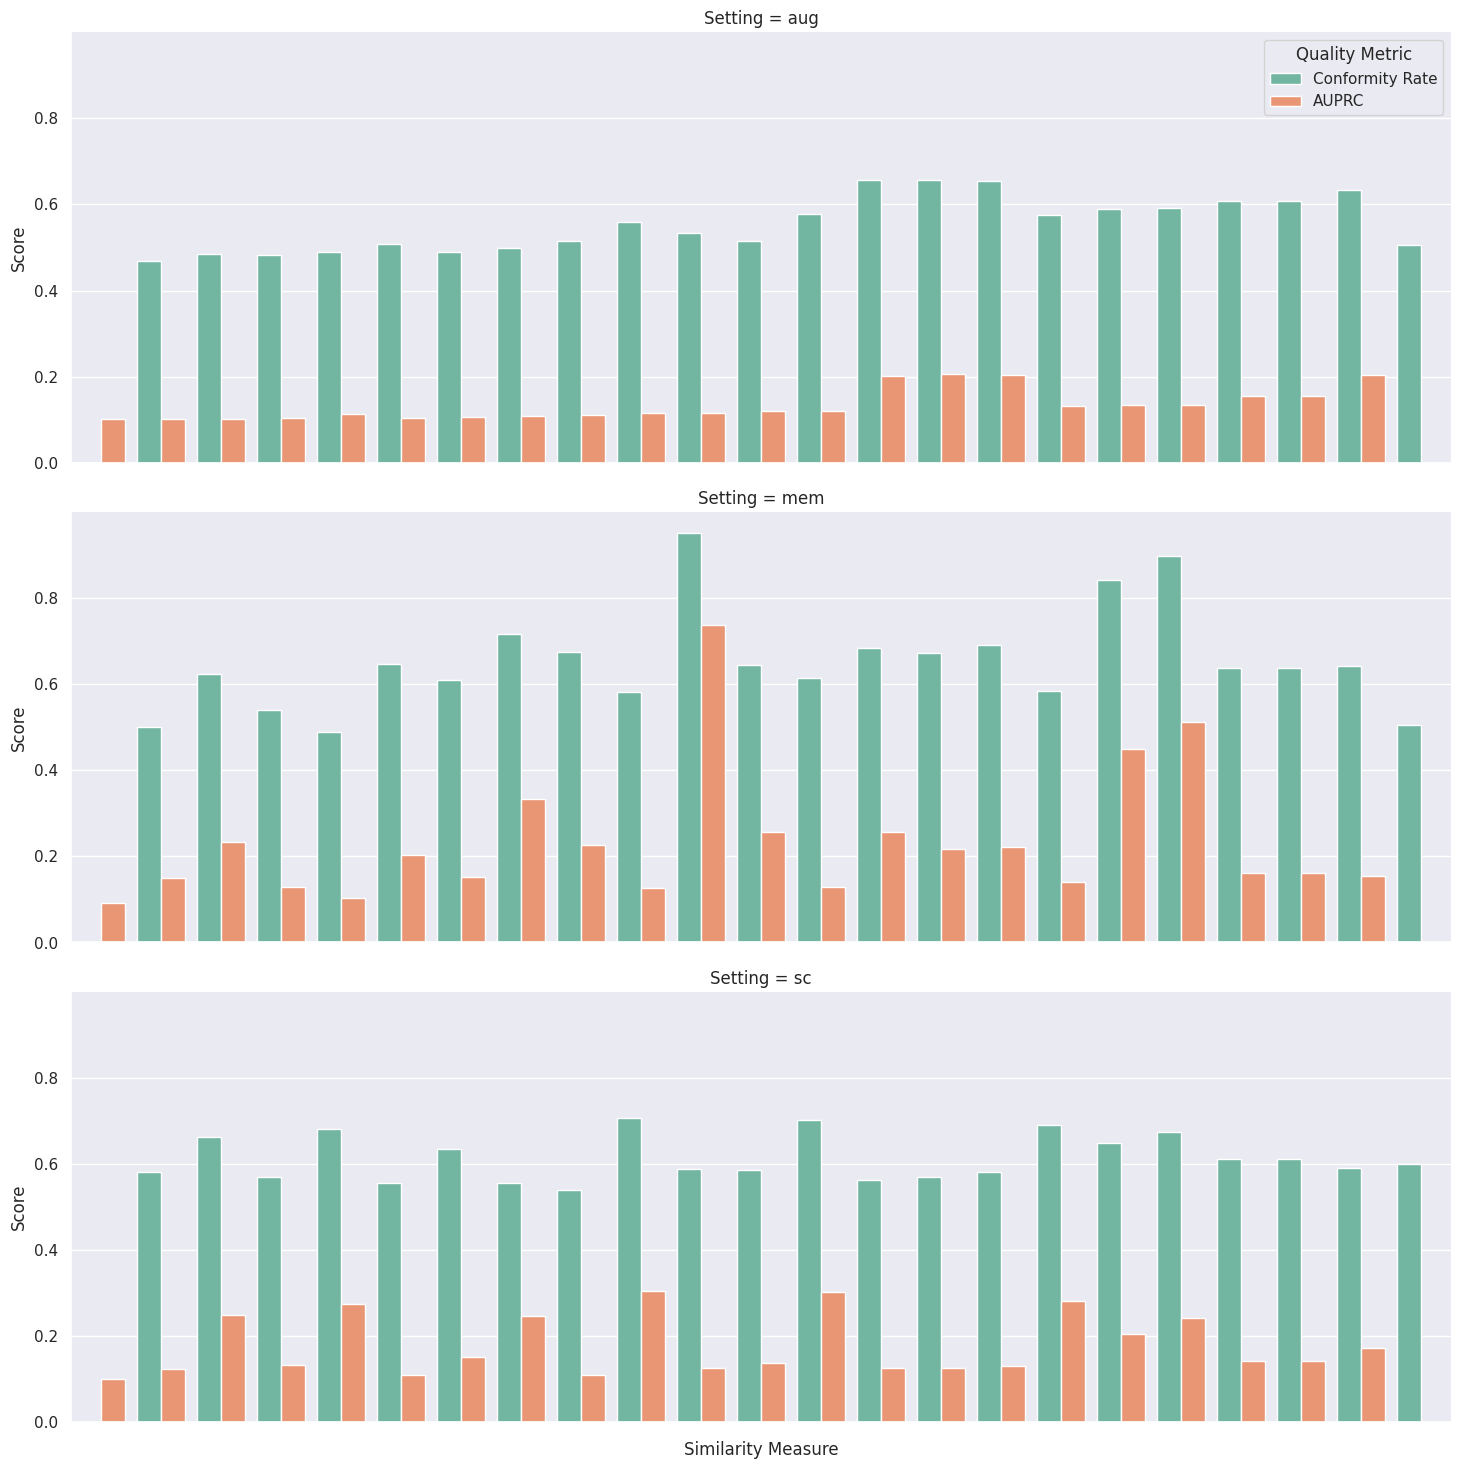

In [3]:
data_plot = data.copy()
data_plot.loc[:, "Quality Metric"] = data_plot.loc[:, "Quality Metric"].map(
    {"Violation Rate": "Conformity Rate", "AUPRC": "AUPRC"}, na_action="ignore"
)
data_plot.loc[data_plot["Quality Metric"] == "Conformity Rate", "Score"] = data_plot.loc[
        data_plot["Quality Metric"] == "Conformity Rate", "Score"
].map(lambda x: 1 - x)
data_sorted = data_plot.sort_values(by=["Score", "Quality Metric"], ascending=True)

sns.set(style="darkgrid")
g = sns.catplot(
    data=data_sorted,
    x="Similarity Measure",
    y="Score",
    hue="Quality Metric",
    row="Setting",
    kind="bar",
    aspect=3,
    palette="Set2",
    legend=True,
    legend_out=False,
)
g.set_xticklabels(rotation=45, ha="right")

In [27]:
# Select score or rank
ycol = "Score" if True else "rank"

ranks = data.groupby(["Setting", "Quality Metric"])["Score"].rank()
data["rank"] = ranks
for qmeasure in data["Quality Metric"].unique():
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(
            data[data["Quality Metric"] == qmeasure]
            .groupby(["Similarity Measure", "Quality Metric", "Setting"])[ycol]
            .agg(["mean", "min", "max"])
            .sort_values(["Setting","mean"])
        )

,,,mean,min,max
Similarity Measure,Quality Metric,Setting,,,
CKA,Violation Rate,aug,0.342889,0.342889,0.342889
SVCCA,Violation Rate,aug,0.343289,0.343289,0.343289
DistanceCorrelation,Violation Rate,aug,0.345522,0.345522,0.345522
RSA,Violation Rate,aug,0.366289,0.366289,0.366289
OrthogonalAngularShapeMetricCentered,Violation Rate,aug,0.3919,0.3919,0.3919
OrthogonalProcrustesCenteredAndNormalized,Violation Rate,aug,0.3919,0.3919,0.3919
AlignedCosineSimilarity,Violation Rate,aug,0.408722,0.408722,0.408722
ProcrustesSizeAndShapeDistance,Violation Rate,aug,0.411778,0.411778,0.411778
JaccardSimilarity,Violation Rate,aug,0.422944,0.422944,0.422944


,,,mean,min,max
Similarity Measure,Quality Metric,Setting,,,
Gulp,AUPRC,aug,0.100955,0.100955,0.100955
RSMNormDifference,AUPRC,aug,0.101124,0.101124,0.101124
PermutationProcrustes,AUPRC,aug,0.101906,0.101906,0.101906
EigenspaceOverlapScore,AUPRC,aug,0.103331,0.103331,0.103331
HardCorrelationMatch,AUPRC,aug,0.104825,0.104825,0.104825
MagnitudeDifference,AUPRC,aug,0.106836,0.106836,0.106836
UniformityDifference,AUPRC,aug,0.107856,0.107856,0.107856
SoftCorrelationMatch,AUPRC,aug,0.111305,0.111305,0.111305
GeometryScore,AUPRC,aug,0.11419,0.11419,0.11419


In [20]:
qual_metrics = data["Quality Metric"].unique()
corrs = np.full(shape=(2, len(qual_metrics), len(qual_metrics)), fill_value=np.nan)  # two elems in first dim for pearson and spearman
metric_to_idx = {m: i for i, m in enumerate(qual_metrics)}

for m1, m2 in itertools.combinations(qual_metrics, r=2):
    scores1 = data.loc[data["Quality Metric"] == m1, "Score"].reset_index(drop=True)
    scores2 = data.loc[data["Quality Metric"] == m2, "Score"].reset_index(drop=True)
    if len(scores1) != len(scores2):
        print(f"Unequal length! {m1, m2}")
        continue

    nan_idx = scores1.isna() | scores2.isna()
    vals1 = scores1[~nan_idx].values
    vals2 = scores2[~nan_idx].values
    p = pearsonr(vals1, vals2)
    s = spearmanr(vals1, vals2)

    i = metric_to_idx[m1]
    j = metric_to_idx[m2]
    corrs[0, i, j] = p.statistic
    corrs[0, j, i] = p.statistic
    corrs[1, i, j] = s.statistic
    corrs[1, j, i] = s.statistic

print("Pearson", corrs[0])
print("Spearman", corrs[1])

Pearson [[        nan -0.65528735]
 [-0.65528735         nan]]
Spearman [[        nan -0.92593057]
 [-0.92593057         nan]]
